In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
meteo = pd.read_csv("meteo-nogal-09.csv",engine = "python")

Unnames = []
for i in range(0,len(meteo.columns)):
    if(re.search("^Unnamed",meteo.columns[i]) != None):
        Unnames.append(meteo.columns[i])
Unnames

meteo = meteo.drop(Unnames,1)
meteo = meteo.drop(0,0)
meteo["DATE"] = pd.to_datetime(meteo["DATE"],dayfirst=True)
meteo = meteo[meteo["DATE"] < "2010-01-01"]
tempD = meteo["DATE"]
tempT = meteo["TIME"]
meteo[meteo.columns] = meteo[meteo.columns].apply(pd.to_numeric, errors='coerce')
meteo["DATE"] = tempD
meteo["TIME"] = tempT
meteo["AÑO"] = meteo["DATE"].dt.year
meteo["MES"] = meteo["DATE"].dt.month
meteo["DIA"] = meteo["DATE"].dt.day
meteo["Tair_AvgDiaria"] = meteo.groupby(["AÑO","MES","DIA"])["airT_Avg"].transform("mean") 
meteo["Tair_max"] = meteo.groupby(["AÑO","MES","DIA"])["airT_Avg"].transform("max")
meteo["Tair_min"] = meteo.groupby(["AÑO","MES","DIA"])["airT_Avg"].transform("min") 



soil = pd.read_csv("soil-nogal-09.csv",engine = ("python"))
soil = pd.DataFrame({"AÑO" : soil["2 Year_RTM  L"],
                     "DIA" : soil["3 Day_RTM  L"],
                     "HORA" : soil["4 Hour_Minute_RTM  L"],
                     "Tsuelo_10cm" : soil["Tsuelo_10cm"],
                     "Tsuelo_20cm" : soil["Tsuelo_20cm"],
                     "Tsuelo_40cm" : soil["Tsuelo_40cm"],
                     "Tsuelo_85cm" : soil["Tsuelo_85cm"]})
soil["T_10cm MediaDiaria"] = soil.groupby("DIA")["Tsuelo_10cm"].transform("mean")
soil["T_10cm MinDiaria"] = soil.groupby("DIA")["Tsuelo_10cm"].transform("min")
soil["T_10cm MaxDiaria"] = soil.groupby("DIA")["Tsuelo_10cm"].transform("max")

soil["T_20cm MediaDiaria"] = soil.groupby("DIA")["Tsuelo_20cm"].transform("mean")
soil["T_20cm MinDiaria"] = soil.groupby("DIA")["Tsuelo_20cm"].transform("min")
soil["T_20cm MaxDiaria"] = soil.groupby("DIA")["Tsuelo_20cm"].transform("max")

soil["T_40cm MediaDiaria"] = soil.groupby("DIA")["Tsuelo_40cm"].transform("mean")
soil["T_40cm MinDiaria"] = soil.groupby("DIA")["Tsuelo_40cm"].transform("min")
soil["T_40cm MaxDiaria"] = soil.groupby("DIA")["Tsuelo_40cm"].transform("max")

soil["T_85cm MediaDiaria"] = soil.groupby("DIA")["Tsuelo_85cm"].transform("mean")
soil["T_85cm MinDiaria"] = soil.groupby("DIA")["Tsuelo_85cm"].transform("min")
soil["T_85cm MaxDiaria"] = soil.groupby("DIA")["Tsuelo_85cm"].transform("max")


soil.head()

,AÑO,DIA,HORA,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,T_10cm MediaDiaria,T_10cm MinDiaria,T_10cm MaxDiaria,T_20cm MediaDiaria,T_20cm MinDiaria,T_20cm MaxDiaria,T_40cm MediaDiaria,T_40cm MinDiaria,T_40cm MaxDiaria,T_85cm MediaDiaria,T_85cm MinDiaria,T_85cm MaxDiaria
0,2009,1,30,14.36,14.70,15.52,17.75,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
1,2009,1,100,14.33,14.70,15.52,17.75,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
2,2009,1,130,14.28,14.69,15.54,17.74,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
3,2009,1,200,14.24,14.69,15.55,17.74,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75
4,2009,1,230,14.19,14.69,15.55,17.73,14.127292,13.52,14.77,14.549792,14.27,14.9,15.565,15.52,15.61,17.714583,17.69,17.75


In [76]:
meteo[140:145]

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,...,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,AÑO,MES,DIA,Tair_AvgDiaria,Tair_max,Tair_min
141,2009-01-01,23:30,-0.918,-0.092,-0.030,14.15,6.406,-167.6,14.94,19.33,...,0.660,1.573,1.038,7.840,2009,1,1,14.942629,25.35,5.938
142,2009-01-01,23:40,-0.992,0.087,-0.033,14.30,6.274,-159.4,14.23,18.24,...,0.673,1.541,1.038,7.844,2009,1,1,14.942629,25.35,5.938
143,2009-01-01,23:50,-0.271,0.185,-0.031,14.05,6.221,-166.8,15.68,20.38,...,0.707,1.486,1.051,7.959,2009,1,1,14.942629,25.35,5.938
144,2009-01-02,00:00,0.630,-0.311,-0.024,13.36,5.537,-169.2,17.24,22.40,...,0.750,1.404,1.053,8.000,2009,1,2,15.753194,26.00,8.420
145,2009-01-02,00:10,1.270,-0.504,-0.004,12.21,6.022,-175.0,18.25,23.23,...,0.720,1.349,0.971,7.393,2009,1,2,15.753194,26.00,8.420


In [15]:
soil.head()

,AÑO,DIA,HORA,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,T_10cm MediaDiaria,T_10cm MinDiaria,T_10cm MaxDiaria,T_20cm MediaDiaria,T_20cm MinDiaria,T_20cm MaxDiaria,T_40cm MediaDiaria,T_40cm MinDiaria,T_40cm MaxDiaria,T_85cm MediaDiaria,T_85cm MinDiaria,T_85cm MaxDiaria
17477,2009,365,2200,13.96,14.13,15.23,17.27,13.527292,13.11,13.96,13.956875,13.78,14.19,15.24625,15.2,15.28,17.297917,17.26,17.35
17478,2009,365,2230,13.96,14.15,15.23,17.27,13.527292,13.11,13.96,13.956875,13.78,14.19,15.24625,15.2,15.28,17.297917,17.26,17.35
17479,2009,365,2300,13.96,14.16,15.24,17.27,13.527292,13.11,13.96,13.956875,13.78,14.19,15.24625,15.2,15.28,17.297917,17.26,17.35
17480,2009,365,2330,13.95,14.16,15.24,17.26,13.527292,13.11,13.96,13.956875,13.78,14.19,15.24625,15.2,15.28,17.297917,17.26,17.35
17481,2009,365,2400,13.94,14.19,15.24,17.26,13.527292,13.11,13.96,13.956875,13.78,14.19,15.24625,15.2,15.28,17.297917,17.26,17.35


In [16]:
soilDIA = soil.drop_duplicates("DIA").reset_index(drop=True)
soilDIA = soilDIA.drop(soilDIA.columns[3:7],1)
soilDIA.head()

,AÑO,DIA,HORA,T_10cm MediaDiaria,T_10cm MinDiaria,T_10cm MaxDiaria,T_20cm MediaDiaria,T_20cm MinDiaria,T_20cm MaxDiaria,T_40cm MediaDiaria,T_40cm MinDiaria,T_40cm MaxDiaria,T_85cm MediaDiaria,T_85cm MinDiaria,T_85cm MaxDiaria
0,2009,1,30,14.127292,13.52,14.77,14.549792,14.27,14.90,15.565000,15.52,15.61,17.714583,17.69,17.75
1,2009,2,30,14.629375,13.87,15.51,14.892500,14.62,15.35,15.728333,15.62,15.85,17.668750,17.65,17.69
2,2009,3,30,14.907917,14.09,15.71,15.204583,14.88,15.61,15.935208,15.86,16.02,17.660000,17.65,17.67
3,2009,4,30,15.047708,14.46,15.59,15.390833,15.15,15.61,16.087500,16.03,16.13,17.676458,17.66,17.69
4,2009,5,30,15.146667,14.70,15.57,15.481667,15.30,15.62,16.207708,16.15,16.23,17.698750,17.69,17.71


In [17]:
meteoDIA = meteo.drop_duplicates(["AÑO","MES","DIA"]).reset_index(drop=True)
meteoDIA = pd.DataFrame({"FECHA"          : meteoDIA["DATE"],
                         "Tair_AvgDiaria" : meteoDIA["Tair_AvgDiaria"],
                         "Tair_max"       : meteoDIA["Tair_max"],  
                         "Tair_min"       : meteoDIA["Tair_min"]})
meteoDIA.head()

,FECHA,Tair_AvgDiaria,Tair_max,Tair_min
0,2009-01-01,14.942629,25.35,5.938
1,2009-01-02,15.753194,26.00,8.420
2,2009-01-03,14.623035,22.54,7.837
3,2009-01-04,14.204236,20.55,8.310
4,2009-01-05,13.520007,19.45,6.797


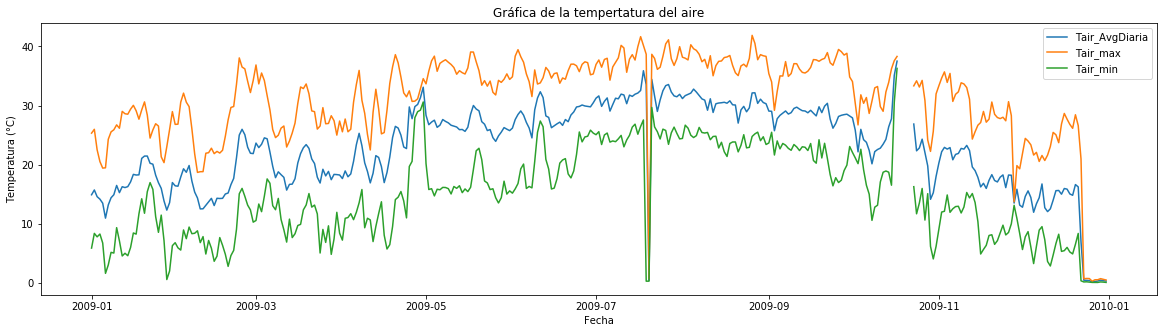

In [24]:
cosas = meteoDIA[["Tair_AvgDiaria","Tair_max","Tair_min"]]
plt.figure(figsize=(20,5))
plt.plot(meteoDIA["FECHA"],cosas)
plt.title("Gráfica de la tempertatura del aire")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend(cosas)
plt.show()

In [114]:
soil1dia = soil[soil["DIA"] == 1]
meteo1dia = []
fecha = []
n = 1
suma = 0
for i in meteo.index:
    if (meteo["DIA"][i] == 1):
        if (n <= 3) :
            n += 1
            suma += meteo["airT_Avg"][i]
        else:
            meteo1dia.append(suma/3)
            fecha.append(i)
            suma = 0
            n = 1
        
    else:
        suma += meteo["airT_Avg"][i]
        meteo1dia.append(suma/3)
        fecha.append(i)
        break
meteo1dia = pd.DataFrame({"FECHA" : fecha,
                          "TEMP" : meteo1dia})

In [115]:
meteo1dia

,FECHA,TEMP
0,4,9.233333
1,8,8.376667
2,12,7.205334
3,16,7.068334
4,20,7.195000
5,24,6.141333
6,28,6.024667
7,32,6.309333
8,36,6.625000
9,40,6.478667


In [112]:
i = 3
meteo["airT_Avg"][i]

9.0599990000000012

In [99]:
meteo.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            52328, 52329, 52330, 52331, 52332, 52333, 52334, 52335, 52336,
            52337],
           dtype='int64', length=52336)

In [95]:
len(meteo1dia)

36

In [113]:
365*48

17520